In [30]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_datacsv = "data/mouse_drug_data.csv"
clinicaltrialcsv = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mousedrug = pd.read_csv(mouse_drug_datacsv)
clinicaltrial = pd.read_csv(clinicaltrialcsv)
# Combine the data into a single dataset
mousedrug_clinicaltrial = pd.merge(mousedrug,clinicaltrial,on='Mouse ID')

# Display the data table for preview
mousedrug_clinicaltrial.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [108]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response = mousedrug_clinicaltrial.groupby(['Drug','Timepoint'])
tumor_mean = tumor_response['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
tumormean_df = pd.DataFrame(tumor_mean)
# Preview DataFrame
tumormean_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [109]:
tumor_response = mousedrug_clinicaltrial.groupby(['Drug','Timepoint'])
tumor_sem = pd.DataFrame(tumor_response['Tumor Volume (mm3)'].sem()).reset_index()
tumor_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [110]:
tumormean_pivot = pd.pivot_table(tumormean_df, values='Tumor Volume (mm3)', index=['Timepoint'],columns=['Drug'])
tumormean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [111]:
time = tumormean_pivot.index.tolist()

In [112]:
capomulin = tumormean_pivot['Capomulin']
infubinol = tumormean_pivot['Infubinol']
ketapril = tumormean_pivot['Ketapril']
placebo = tumormean_pivot['Placebo']

In [113]:
sems_pivot = tumor_sem.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
semsc = sems_pivot['Capomulin']
semsi = sems_pivot['Infubinol']
semsk = sems_pivot['Ketapril']
semsp = sems_pivot['Placebo']

In [114]:
sems_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


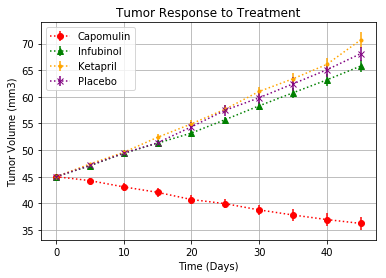

In [146]:
# Generate the Plot (with Error Bars)
plt.errorbar(time, capomulin, yerr=semsc, marker="o", color="red", linestyle=':')
plt.errorbar(time, infubinol, yerr=semsi, marker="^", color="green", linestyle=':')
plt.errorbar(time, ketapril, yerr=semsk, marker=".", color="orange", linestyle=':')
plt.errorbar(time, placebo, yerr=semsp, marker="x", color="purple", linestyle=':')
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upperleft")
plt.grid()

plt.savefig('tumor_response.png')
plt.show()

## Metastatic Response to Treatment

In [147]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metresponse = mousedrug_clinicaltrial.groupby(['Drug','Timepoint'])
metresponsemean = pd.DataFrame(metresponse['Metastatic Sites'].mean())
metresponsemean.head()
# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [94]:
met_pivot = pd.pivot_table(metresponsemean, values='Metastatic Sites', index=['Timepoint'],columns=['Drug'])
met_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [95]:
# Store the Standard Error of Metastatic Volumes Grouped by Drug and Timepoint
sems_metastatic = mousedrug_clinicaltrial.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem().reset_index()

# Convert to DataFrame
sems_metastatic_table = pd.DataFrame(sems_metastatic)

# Preview DataFrame
sems_metastatic_table.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [96]:
time = met_pivot.index.tolist()

In [97]:
capomulin = met_pivot['Capomulin']
infubinol = met_pivot['Infubinol']
ketapril = met_pivot['Ketapril']
placebo = met_pivot['Placebo']

In [98]:
metasems2 = sems_metastatic_table.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

metasems2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [103]:
metc = metasems2['Capomulin']
meti = metasems2['Infubinol']
metk = metasems2['Ketapril']
metp = metasems2['Placebo']

In [104]:
met2_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


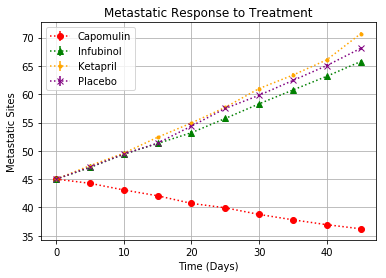

In [117]:
plt.errorbar(time, capomulin, yerr=metc, marker="o", color="red",linestyle=':')
plt.errorbar(time, infubinol, yerr=meti, marker="^", color="green",linestyle=':')
plt.errorbar(time, ketapril, yerr=metk, marker=".", color="orange",linestyle=':')
plt.errorbar(time, placebo, yerr=metp, marker="x", color="purple",linestyle=':')
plt.title("Metastatic Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc="upperleft")
plt.grid()

plt.savefig('metastatic_response.png')
plt.show()

## Survival Rates

In [118]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_grouped_df = mousedrug_clinicaltrial.groupby(['Drug','Timepoint'])['Mouse ID']
mousecount_df = mouse_grouped_df.nunique()

# Convert to DataFrame
mousecount_df = pd.DataFrame(mousecount_df).rename(columns={'Mouse ID':'Mouse Count'})


# Preview DataFrame

mousecount_df.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [119]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame
mousecount_format = mousecount_df.unstack(0)
mousecount_format = mousecount_format["Mouse Count"]
mousecount_format.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


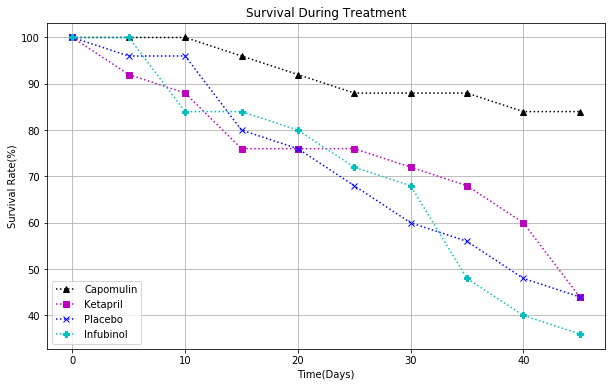

In [120]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize=(10,6))
plt.plot(np.arange(0, 50, 5), mousecount_df.loc["Capomulin", "Mouse Count"]/25*100,
         marker = '^', label = "Capomulin", linestyle =':',color='k')
plt.plot(np.arange(0, 50, 5), mousecount_df.loc["Ketapril", "Mouse Count"]/25*100,
         marker = 's', label = "Ketapril", linestyle = ':',color='m')
plt.plot(np.arange(0, 50, 5), mousecount_df.loc["Placebo", "Mouse Count"]/25*100,
         marker = 'x', label = "Placebo", linestyle =':',color='b')
plt.plot(np.arange(0, 50, 5), mousecount_df.loc["Infubinol", "Mouse Count"]/25*100,
         marker = 'P', label = "Infubinol", linestyle =':',color='c')


plt.grid()
plt.title('Survival During Treatment')
plt.xlabel('Time(Days)')
plt.ylabel('Survival Rate(%)')
plt.legend(loc='lower left')


# Save the Figure
plt.savefig('survivalrate.png')

# Show the Figure
plt.show()

## Summary Bar Graph

In [23]:
tumormean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [24]:
# Calculate the percent changes for each drug
tumorchange = (tumormean_pivot.loc[45,:] - tumormean_pivot.loc[0, :])/tumormean_pivot.loc[0, :] * 100
# Display the data to confirm
tumorchange

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [25]:
# Store all Relevant Percent Changes into a Tuple
percentchange = (tumorchange['Capomulin'],tumorchange['Infubinol'],tumorchange['Ketapril'],tumorchange['Placebo'])

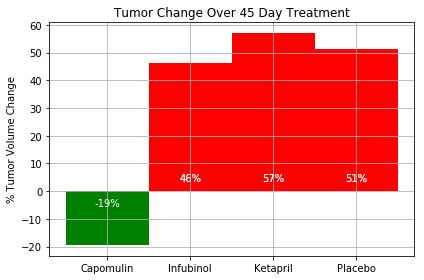

In [145]:
fig, ax = plt.subplots()
index = np.arange(len(percentchange))  
width = 1

# Splice the data between passing and failing drugs
drugs_pass = plt.bar(index[0], percentchange[0], width, color='green')
drugs_fail = plt.bar(index[1:], percentchange[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
ax.set_xticks(index)
ax.set_xticklabels(('Capomulin','Infubinol','Ketapril','Placebo'))
plt.grid()


# Use functions to label the percentages of changes
def percentfail(drugs):
    for drug in drugs_fail:
        height = drug.get_height()
        plt.text(drug.get_x() + drug.get_width()/2., 3,
                '%d' % int(height) + "%",
                ha='center', va='bottom', color="white")      
percentfail(drugs_fail)


def percentpass(drugs):
    for drug in drugs_pass:
        height = drug.get_height()
        plt.text(drug.get_x() + drug.get_width()/2., -6,
                '%d' % int(height) + "%",
                 ha='center', va='bottom', color="white")
        
# Call functions to implement the function calls
percentpass(drugs_pass)
percentfail(drugs_fail)


plt.tight_layout()
plt.savefig("tumor_percent_change.png")
plt.show()